In [6]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np

In [7]:
str_filename = '328_sales.csv'

In [8]:
fh = open(str_filename)
csv_reader = csv.reader(fh)

In [9]:
csv_header = next(csv_reader)
csv_header

['block_time',
 'project/addresss',
 'eth_price',
 'usd_price',
 'link',
 'platform',
 'seller',
 'buyer']

In [10]:
fh.close()

In [11]:
df_sig = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
df_sig


,block_time,project/addresss,eth_price,usd_price,link,platform,seller,buyer
0,2022-07-28T13:02:22+00:00,ArtBlocks,2.40,NaN,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x43c7c,\x6b6ae
1,2022-07-27T18:17:13+00:00,ArtBlocks,1.15,1771.57500,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x32615,\x26d7b
2,2022-07-27T18:16:26+00:00,ArtBlocks,1.20,1848.60000,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x32615,\x02623
3,2022-07-27T18:13:59+00:00,ArtBlocks,1.10,1688.25083,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x0c4a9,\xfd220
4,2022-07-27T18:13:35+00:00,ArtBlocks,8.00,12289.36000,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xfaff9,\xfd220
...,...,...,...,...,...,...,...,...
280,2022-06-29T17:37:06+00:00,ArtBlocks,1.33,1453.33090,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xb99ea,\x3612b
281,2022-06-29T17:36:22+00:00,ArtBlocks,1.30,1419.45627,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xbb7c9,\xcd32f
282,2022-06-29T17:36:00+00:00,ArtBlocks,1.30,1420.54900,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xeaf96,\xd1cef
283,2022-06-29T17:35:34+00:00,ArtBlocks,1.35,1477.19700,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xe8616,\xcd32f


In [18]:
df_sig['Date'] = df_sig['block_time'].map(lambda x: datetime.fromisoformat(str(x)))
df_sig['Date']

0     2022-07-28 13:02:22+00:00
1     2022-07-27 18:17:13+00:00
2     2022-07-27 18:16:26+00:00
3     2022-07-27 18:13:59+00:00
4     2022-07-27 18:13:35+00:00
                 ...           
280   2022-06-29 17:37:06+00:00
281   2022-06-29 17:36:22+00:00
282   2022-06-29 17:36:00+00:00
283   2022-06-29 17:35:34+00:00
284   2022-06-29 17:35:10+00:00
Name: Date, Length: 285, dtype: datetime64[ns, UTC]

Text(0, 0.5, 'eth_price(eth)')

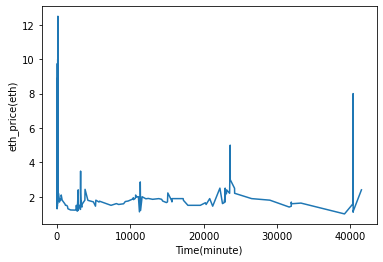

In [33]:
mintStart = datetime.fromisoformat("2022-06-29T17:00:00+00:00")
endDate = datetime.fromisoformat("2022-06-29T18:30:00+00:00")
df_new=df_sig.loc[(df_sig['Date'] <= endDate)]
df_new=df_sig.loc[(df_sig['Date'] >= mintStart)]
x = df_new['Date'] - mintStart
x = (x.dt.total_seconds() / 60)
y = df_new['eth_price']
plt.plot(x, y)
plt.xlabel('Time(minute)')
plt.ylabel('eth_price(eth)')